# Akigora

In [137]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
DFexp = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name = 'Collection Experts')

In [170]:
DFexp['updatedAt'] = pd.to_datetime(DFexp['updatedAt'], unit='ms')

In [171]:
DFexp['createdAt'] = pd.to_datetime(DFexp['createdAt'], format='%d/%m/%Y', errors='coerce')

In [174]:
DFexp

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27 14:23:54.005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,NaN,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,NaN,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15 08:50:42.806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,NaN,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12 07:48:00.180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,NaN,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [177]:
DFexp['linkedInImport'] = DFexp['linkedInImport'].fillna(0).astype(bool)

In [178]:
DFexp

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,False,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,True,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,True,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,False,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27 14:23:54.005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,False,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,False,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15 08:50:42.806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,False,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12 07:48:00.180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,False,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [179]:
DFexp.shape

(2455, 28)

In [180]:
seuil_non_nullite = int(0.85 * len(DFexp))

DFexp = DFexp.dropna(axis=1, thresh=seuil_non_nullite)
DFexp.shape

(2455, 11)

In [76]:
DFint = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name = 'Collection Interventions')
DFint.head()

,_id,intitule,localisation,date_debut,date_fin,replacement_or_creation,presentiel_distanciel,isClosed,daysPlanned,forfait_remuneration
0,656ca1bf843c536c576b92c4,formation Qualiopi,Oloron Sainte-Marie,03/10/2023,24/11/2023,Création,presentiel,1.0,NaN,hourly
1,656a06f9843c536c576b8eda,Management & Leadership,Bordeaux,15/05/2024,15/05/2024,Création de poste,NaN,0.0,NaN,hourly
2,6569f99411ad9c29f93181cd,Management et Ressources Humaines,Bordeaux,05/12/2023,19/12/2023,reconduction,presentiel,0.0,NaN,hourly
3,6569f6d111ad9c29f93181bd,Jury : LV2 Italien,Bordeaux,07/06/2023,07/06/2023,Création,NaN,0.0,NaN,hourly
4,6569f6a511ad9c29f93181bc,"Jury ""entretien professionnel"" : rapports d'ac...",Bordeaux,25/05/2023,25/05/2023,Création,presentiel,0.0,NaN,hourly


In [82]:
DFexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   _id                                   2455 non-null   object        
 1   type                                  2455 non-null   object        
 2   userId                                2455 non-null   object        
 3   createdAt                             2220 non-null   datetime64[ns]
 4   updatedAt                             2455 non-null   datetime64[ns]
 5   domains                               2133 non-null   object        
 6   sectors                               1996 non-null   object        
 7   studyLevel                            978 non-null    object        
 8   studyTitle                            959 non-null    object        
 9   location                              2071 non-null   object        
 10  

In [163]:
import pandas as pd

# Charger le DataFrame depuis le fichier Excel
DFexp = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name='Collection Experts')

# Remplacer les valeurs vides par 'Faux'
DFexp['linkedInImport'].fillna('Faux', inplace=True)

# Convertir la colonne en type booléen
DFexp['linkedInImport'] = DFexp['linkedInImport'].apply(lambda x: x == 'Vrai')



In [165]:
DFexp

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,1701460182590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,False,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,1701448860078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,False,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,1701426872307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,False,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,1701439187742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,False,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,1701364372080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,1635344634005,Services aux entreprises,NaN,NaN,NaN,"Bordeaux, France",...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,False,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,1635344634004,Commerce / Négoce / Distribution,NaN,NaN,NaN,"Libourne, France",...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,False,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,1660553442806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...","Bordeaux, France",...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,False,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,1652341680180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,False,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


In [83]:
DFint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      579 non-null    object 
 1   intitule                 579 non-null    object 
 2   localisation             569 non-null    object 
 3   date_debut               557 non-null    object 
 4   date_fin                 556 non-null    object 
 5   replacement_or_creation  560 non-null    object 
 6   presentiel_distanciel    66 non-null     object 
 7   isClosed                 554 non-null    float64
 8   daysPlanned              5 non-null      float64
 9   forfait_remuneration     504 non-null    object 
dtypes: float64(2), object(8)
memory usage: 45.4+ KB


In [84]:
DFexp.isnull().sum()

_id                                        0
type                                       0
userId                                     0
createdAt                                235
updatedAt                                  0
domains                                  322
sectors                                  459
studyLevel                              1477
studyTitle                              1496
location                                 384
location2                               1529
mobility                                 478
daily_hourly_prices.daily_price_min      967
daily_hourly_prices.daily_price_max      960
daily_hourly_prices.hourly_price_min    1009
daily_hourly_prices.hourly_price_max    1000
availabilities.availability_min         1965
availabilities.availability_max         1965
experiences                              264
references                              1044
visible                                  312
percentage                               227
linkedInIm

In [85]:
DFint.isnull().sum()

_id                          0
intitule                     0
localisation                10
date_debut                  22
date_fin                    23
replacement_or_creation     19
presentiel_distanciel      513
isClosed                    25
daysPlanned                574
forfait_remuneration        75
dtype: int64

## DEPARTEMENT RH

### Nombres d'experts inscrits sur la plateforme

In [88]:
reference_date = datetime.now()

In [89]:
DFexp['days_since_update'] = (reference_date - DFexp['updatedAt']).dt.days

In [90]:
DFexp.head()

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo,days_since_update
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,2
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,NaN,NaN,NaN,Bordeaux et périphérie,...,"[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,1.0,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",2
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse et périphérie,...,"[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,1.0,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",3
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,"Saint-Étienne, Loire, Lyon, paris,",...,"[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,NaN,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""...",3
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [93]:
active_users = DFexp[DFexp['days_since_update'] <= 90]

In [162]:
num_active_users = len(active_users)
num_active_users

541

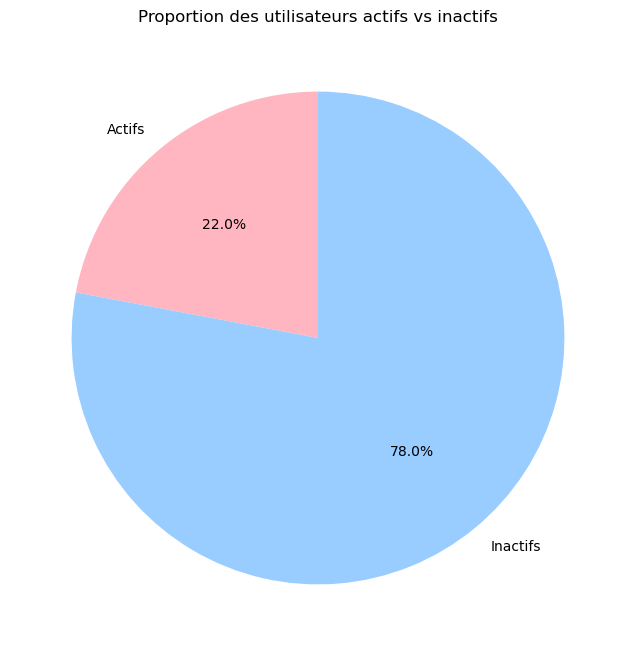

In [148]:
total_users = len(DFexp)

num_active_users = len(active_users)

num_inactive_users = total_users - num_active_users

labels = ['Actifs', 'Inactifs']
sizes = [num_active_users, num_inactive_users]
colors = ['#FFB6C1', '#99CCFF']  # rose pastel et bleu pastel

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion des utilisateurs actifs vs inactifs')
plt.show()


In [96]:
#Nombres d'experts désinscrits

In [ ]:
#Nombres d'experts visible sur la plateforme / temporairement

In [97]:
DFexp['visible'].astype(bool)

0       False
1       False
2        True
3        True
4        True
        ...  
2450     True
2451     True
2452     True
2453     True
2454     True
Name: visible, Length: 2455, dtype: bool

In [107]:
nb_visible = sum(DFexp['visible']==1.0)
nb_visible

1789

In [112]:
nb_tempo_invisible = sum(DFexp['temporarilyInvisible']==1.0)
nb_tempo_invisible

101

In [79]:
#% d'experts à profil complété à 100% 

In [113]:
DFexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   _id                                   2455 non-null   object        
 1   type                                  2455 non-null   object        
 2   userId                                2455 non-null   object        
 3   createdAt                             2220 non-null   datetime64[ns]
 4   updatedAt                             2455 non-null   datetime64[ns]
 5   domains                               2133 non-null   object        
 6   sectors                               1996 non-null   object        
 7   studyLevel                            978 non-null    object        
 8   studyTitle                            959 non-null    object        
 9   location                              2071 non-null   object        
 10  

In [114]:
profil_remplis = sum(DFexp['percentage']==100)
profil_remplis

1531

In [115]:
#% d'experts à profil incomplet 

In [116]:
profil_incomplet = sum(DFexp['percentage'] !=100)
profil_incomplet

924

In [117]:
# % d'expert par domaine d'intervention

In [120]:
Domains = DFexp['domains'].unique()
Domains

array(['Enseignement / Recherche / Formation', nan,
       'Informatique / Télécoms', 'Commerce / Négoce / Distribution',
       'Études et conseils', 'Industrie',
       'Métallurgie / Travail du métal', 'Management',
       'Édition / Communication / Information',
       'Hôtellerie / Restauration / Tourisme', 'Services aux entreprises',
       'Transports / Logistique', 'Agroalimentaire / Agriculture',
       'Électronique / Électricité', 'Énergies / Environnement',
       'Architecture / Paysage / Urbanisme', 'Banque / Assurance',
       'Arts / Artisanat / Culture', 'Textile / Habillement / Chaussure',
       'Armée / Sécurité', 'Santé / Social / Sport et loisirs',
       'Chimie / Parachimie / Pharmacie', 'Conseils/services',
       'BTP - Immobilier', 'BTP / Construction', 'Plastique / Caoutchouc',
       'Traduction / Interprétariat', 'Bois / Papier / Carton',
       'Machines et équipements / Automobile',
       'Commerce, Négoce, Distribution'], dtype=object)

In [127]:
Domains_grouped = DFexp.groupby('domains').size()
Domains_grouped

domains
Agroalimentaire / Agriculture             58
Architecture / Paysage / Urbanisme        13
Armée / Sécurité                           7
Arts / Artisanat / Culture                28
BTP - Immobilier                           2
BTP / Construction                        33
Banque / Assurance                        62
Bois / Papier / Carton                     4
Chimie / Parachimie / Pharmacie           24
Commerce / Négoce / Distribution         266
Commerce, Négoce, Distribution             1
Conseils/services                          8
Enseignement / Recherche / Formation     346
Hôtellerie / Restauration / Tourisme      57
Industrie                                112
Informatique / Télécoms                  299
Machines et équipements / Automobile      14
Management                                40
Métallurgie / Travail du métal             5
Plastique / Caoutchouc                     5
Santé / Social / Sport et loisirs         63
Services aux entreprises                 255
Te

In [129]:
A = sum(Domains_grouped)
A

2133

In [135]:
Pourcentage = round((DFexp['domains'].dropna().value_counts(normalize=True)*100), 2)
Pourcentage

domains
Enseignement / Recherche / Formation     16.22
Informatique / Télécoms                  14.02
Commerce / Négoce / Distribution         12.47
Services aux entreprises                 11.95
Études et conseils                        7.74
Édition / Communication / Information     7.27
Industrie                                 5.25
Santé / Social / Sport et loisirs         2.95
Banque / Assurance                        2.91
Agroalimentaire / Agriculture             2.72
Hôtellerie / Restauration / Tourisme      2.67
Énergies / Environnement                  2.25
Management                                1.88
Transports / Logistique                   1.55
BTP / Construction                        1.55
Arts / Artisanat / Culture                1.31
Chimie / Parachimie / Pharmacie           1.13
Textile / Habillement / Chaussure         0.84
Machines et équipements / Automobile      0.66
Architecture / Paysage / Urbanisme        0.61
Conseils/services                         0.38
Élect

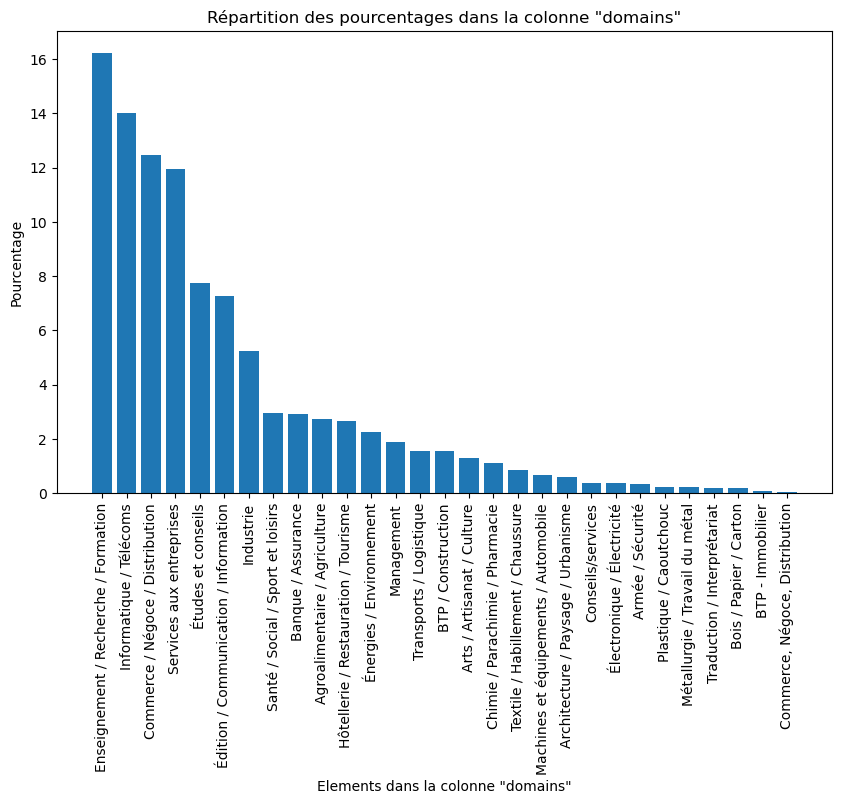

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(Pourcentage.index, Pourcentage)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains"')
plt.xticks(rotation=90)

plt.show()

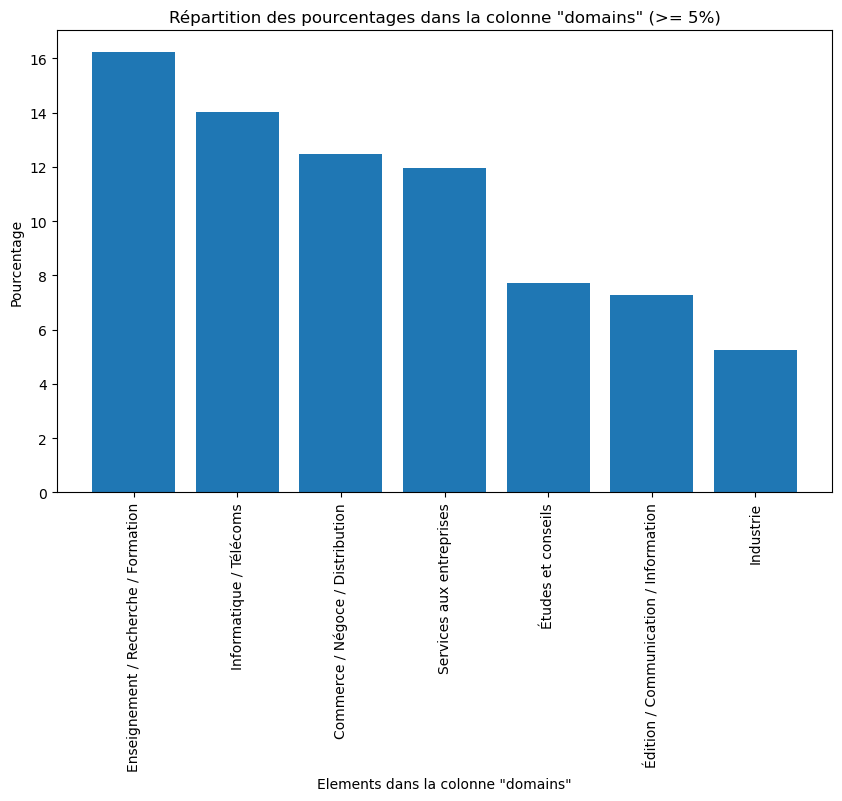

In [149]:
pourcentage_filtre = Pourcentage[Pourcentage >= 5]

plt.figure(figsize=(10, 6))
plt.bar(pourcentage_filtre.index, pourcentage_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()